<a href="https://colab.research.google.com/github/YannisZang/CS_5864/blob/main/HW1/Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 3: Fourier transform and convolution theorem (15 points)

Using the scipy.fft library, you will perform Fourier transforms on filters and images, visualize the magnitude spectra, and apply these filters in the frequency domain using the convolution theorem.



1.   Fourier transform of filters:


*   Take the 2D Fourier Transform of each filter from the previous section and visualize the magnitude spectrum next to each filter.
*   Make sure to apply fftshift (or its inverse, if appropriate) to your visualizations to ensure correct display. This is necessary so that the zero frequency component appears in the middle of the figure, like the plots we have visualized in class.




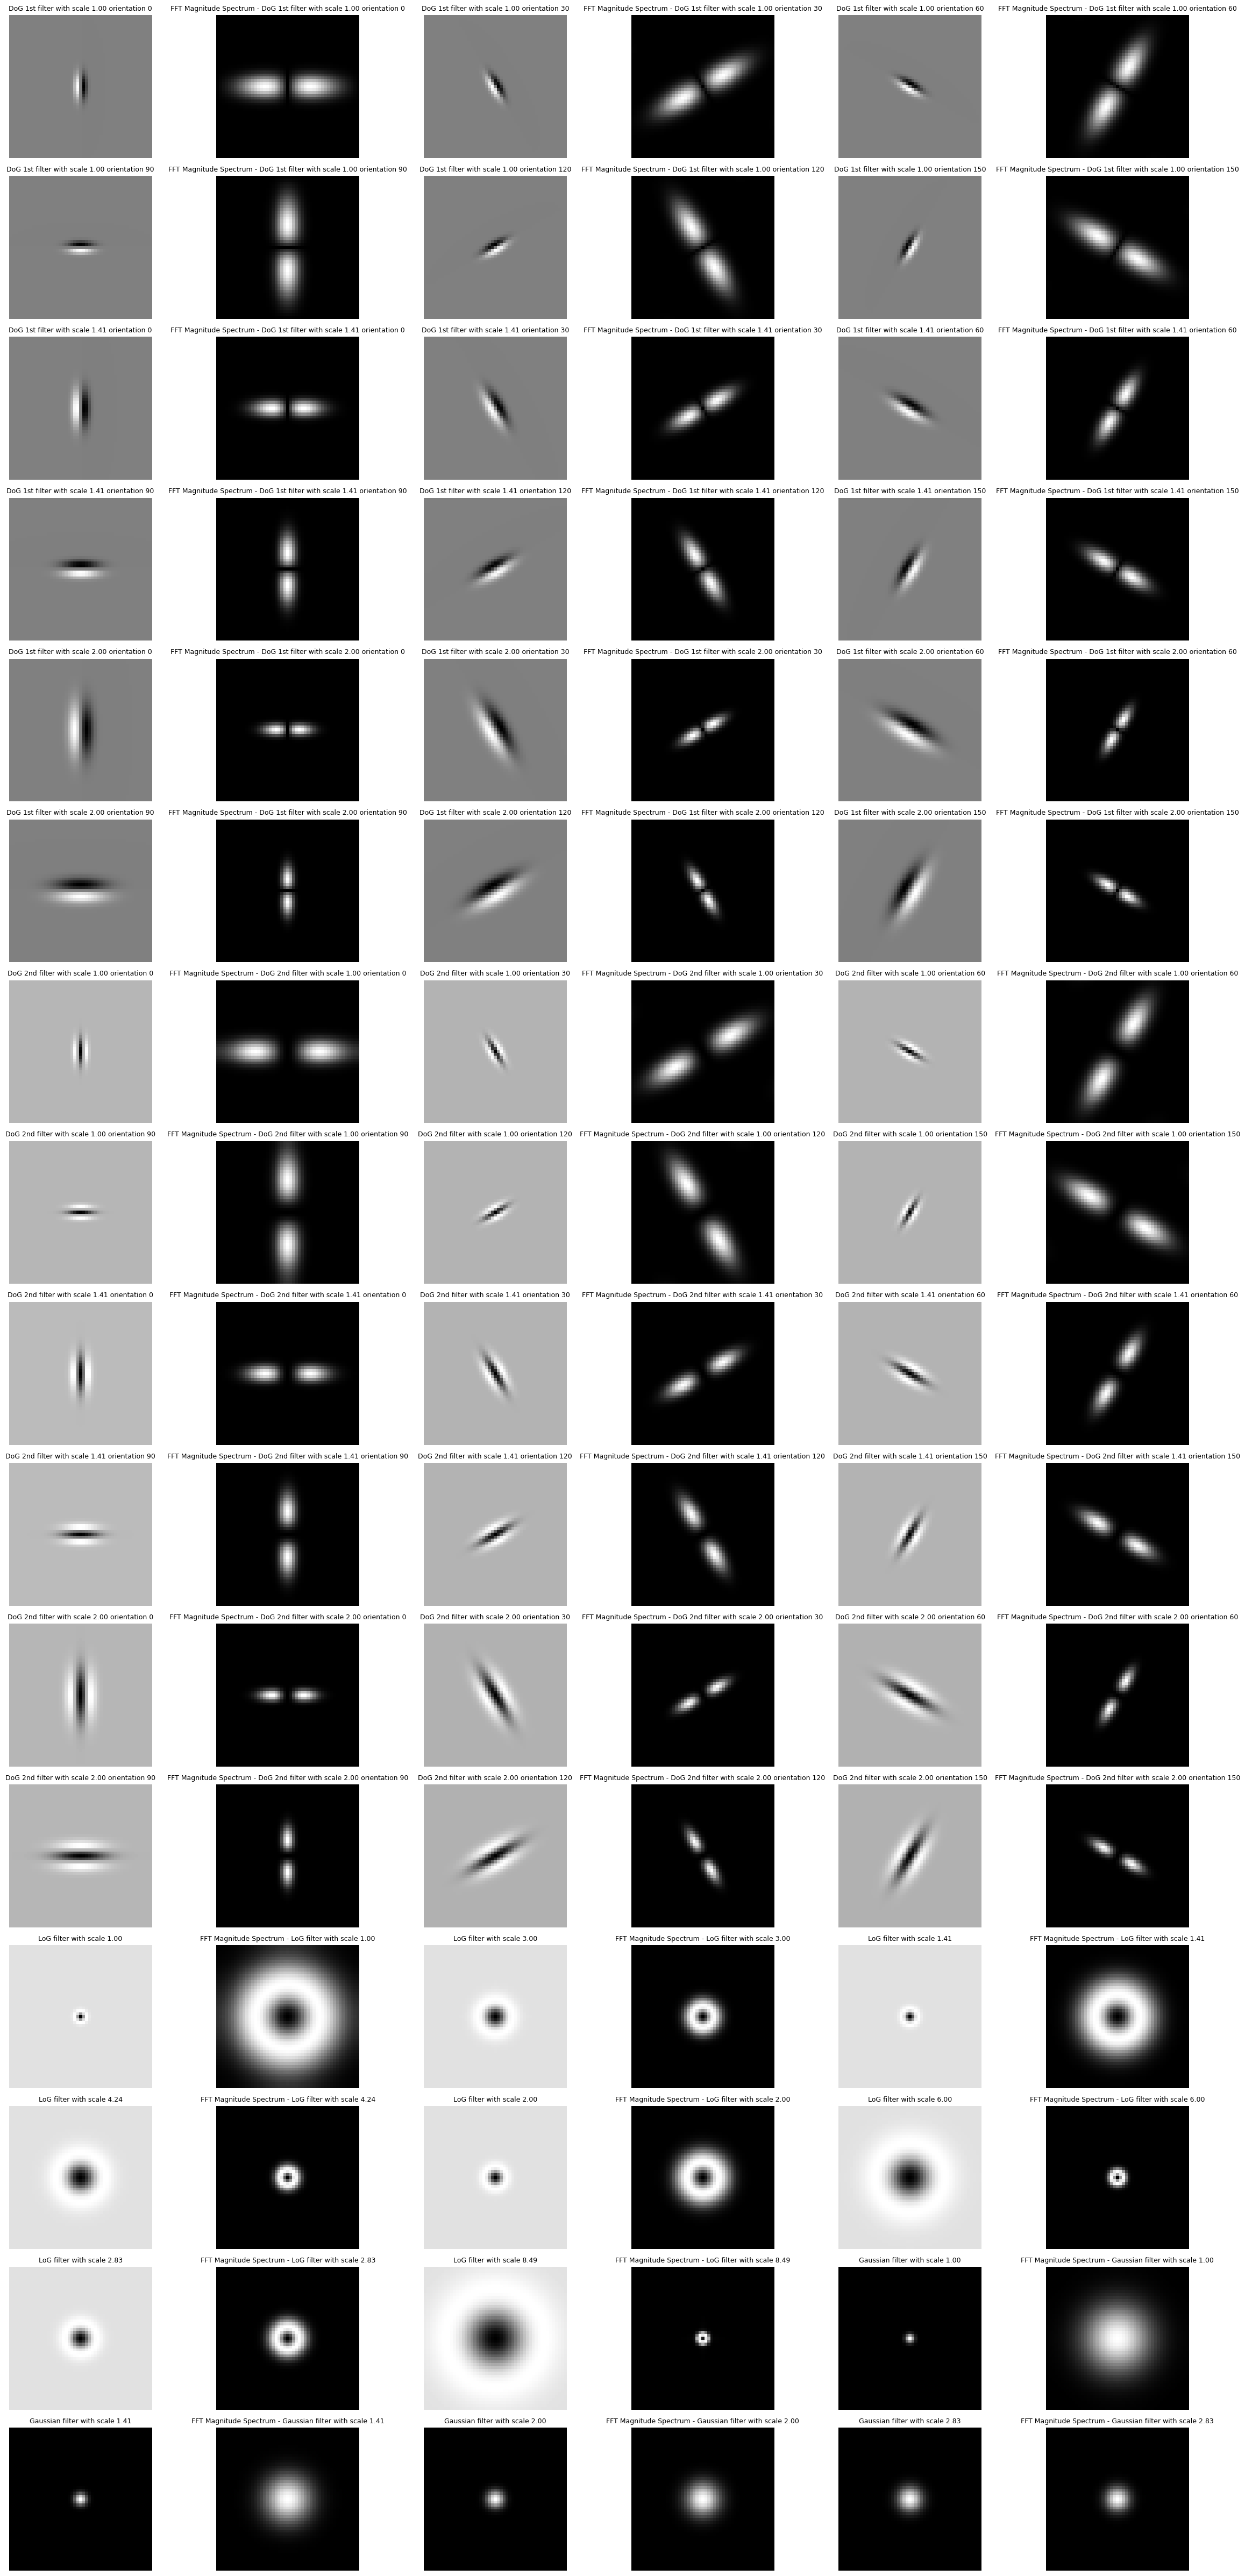

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft

# load filter banaks
load_filter = "/content/sample_data/filter_bank.pkl"

with open(load_filter, "rb") as f:
    filter_bank = pickle.load(f)

# load filter titles
load_titles = "/content/sample_data/titles.pkl"

with open(load_titles, "rb") as f:
    titles = pickle.load(f)

# list of discrete fft
filter_fft = []
fft_titles = []

for i, filter in enumerate(filter_bank):
  fft_tran = fft.fft2(filter)
  filter_fft.append(fft.fftshift(fft_tran))
  fft_titles.append(f"FFT Magnitude Spectrum - {titles[i]}")

## display
fig, axes = plt.subplots(16, 6, figsize=(24, 48))
for i, ax in enumerate(axes.flat):
    idx = i // 2
    mode = i % 2        # 0=filter_bak, 1=FFT

    if mode == 0:  # filter bank
        ax.imshow(filter_bank[idx], cmap="gray")
        ax.set_title(f"{titles[idx]}", fontsize=9)
    else:   # FFT
        magnitude = np.abs(filter_fft[idx])
        ax.imshow(magnitude, cmap="gray")
        ax.set_title(f"{fft_titles[idx]}", fontsize=9)

    ax.axis("off")

plt.tight_layout()
plt.show()




2.   Image Fourier transform:


*   Take the Fourier transform of the sample image hokie.jpg Download hokie.jpg. Convert the image to grayscale before taking the Fourier transform.
*   Visualize the magnitude spectrum of the image Fourier transform.
*   Apply shifting as needed to the visualization for proper display.
*   Inspect the magnitude spectrum image - do you notice any patterns or distinct lines? Identify which part of the image they might correspond to.







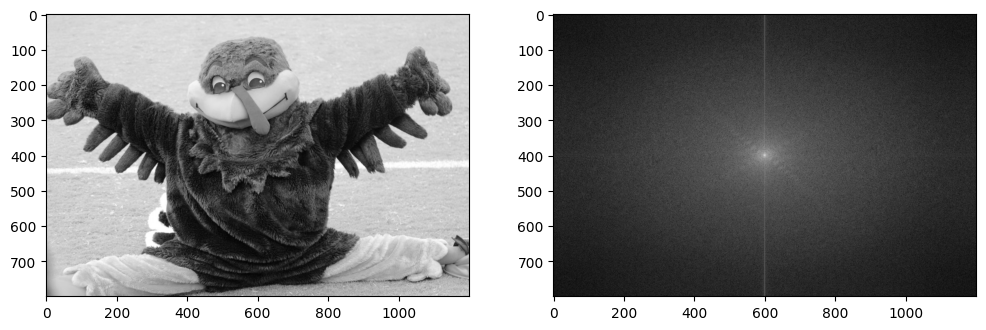

In [ ]:
from skimage import io, color

img = io.imread("/content/sample_data/hokie-1.jpg")

img = color.rgb2gray(img)

img_fft = fft.fftshift(fft.fft2(img))

fig, ax = plt.subplots(1, 2, figsize=(12, 12))
ax[0].imshow(img, cmap="gray")
ax[1].imshow(np.log1p(np.abs(img_fft)), cmap="gray")
plt.show()



3.   Convolution theorem:


Utilize the convolution theorem to apply each filter from your filter bank in the frequency domain. Note, you might need to add zero padding so they are the correct size for the multiplication. Specifically, for each filter:
*   Multiply its Fourier transform with the Fourier transform of the image.
*   Perform the inverse Fourier transform on the resulting product.
*   Show the output image obtained after the inverse Fourier transform and compare it with the original filtering result.







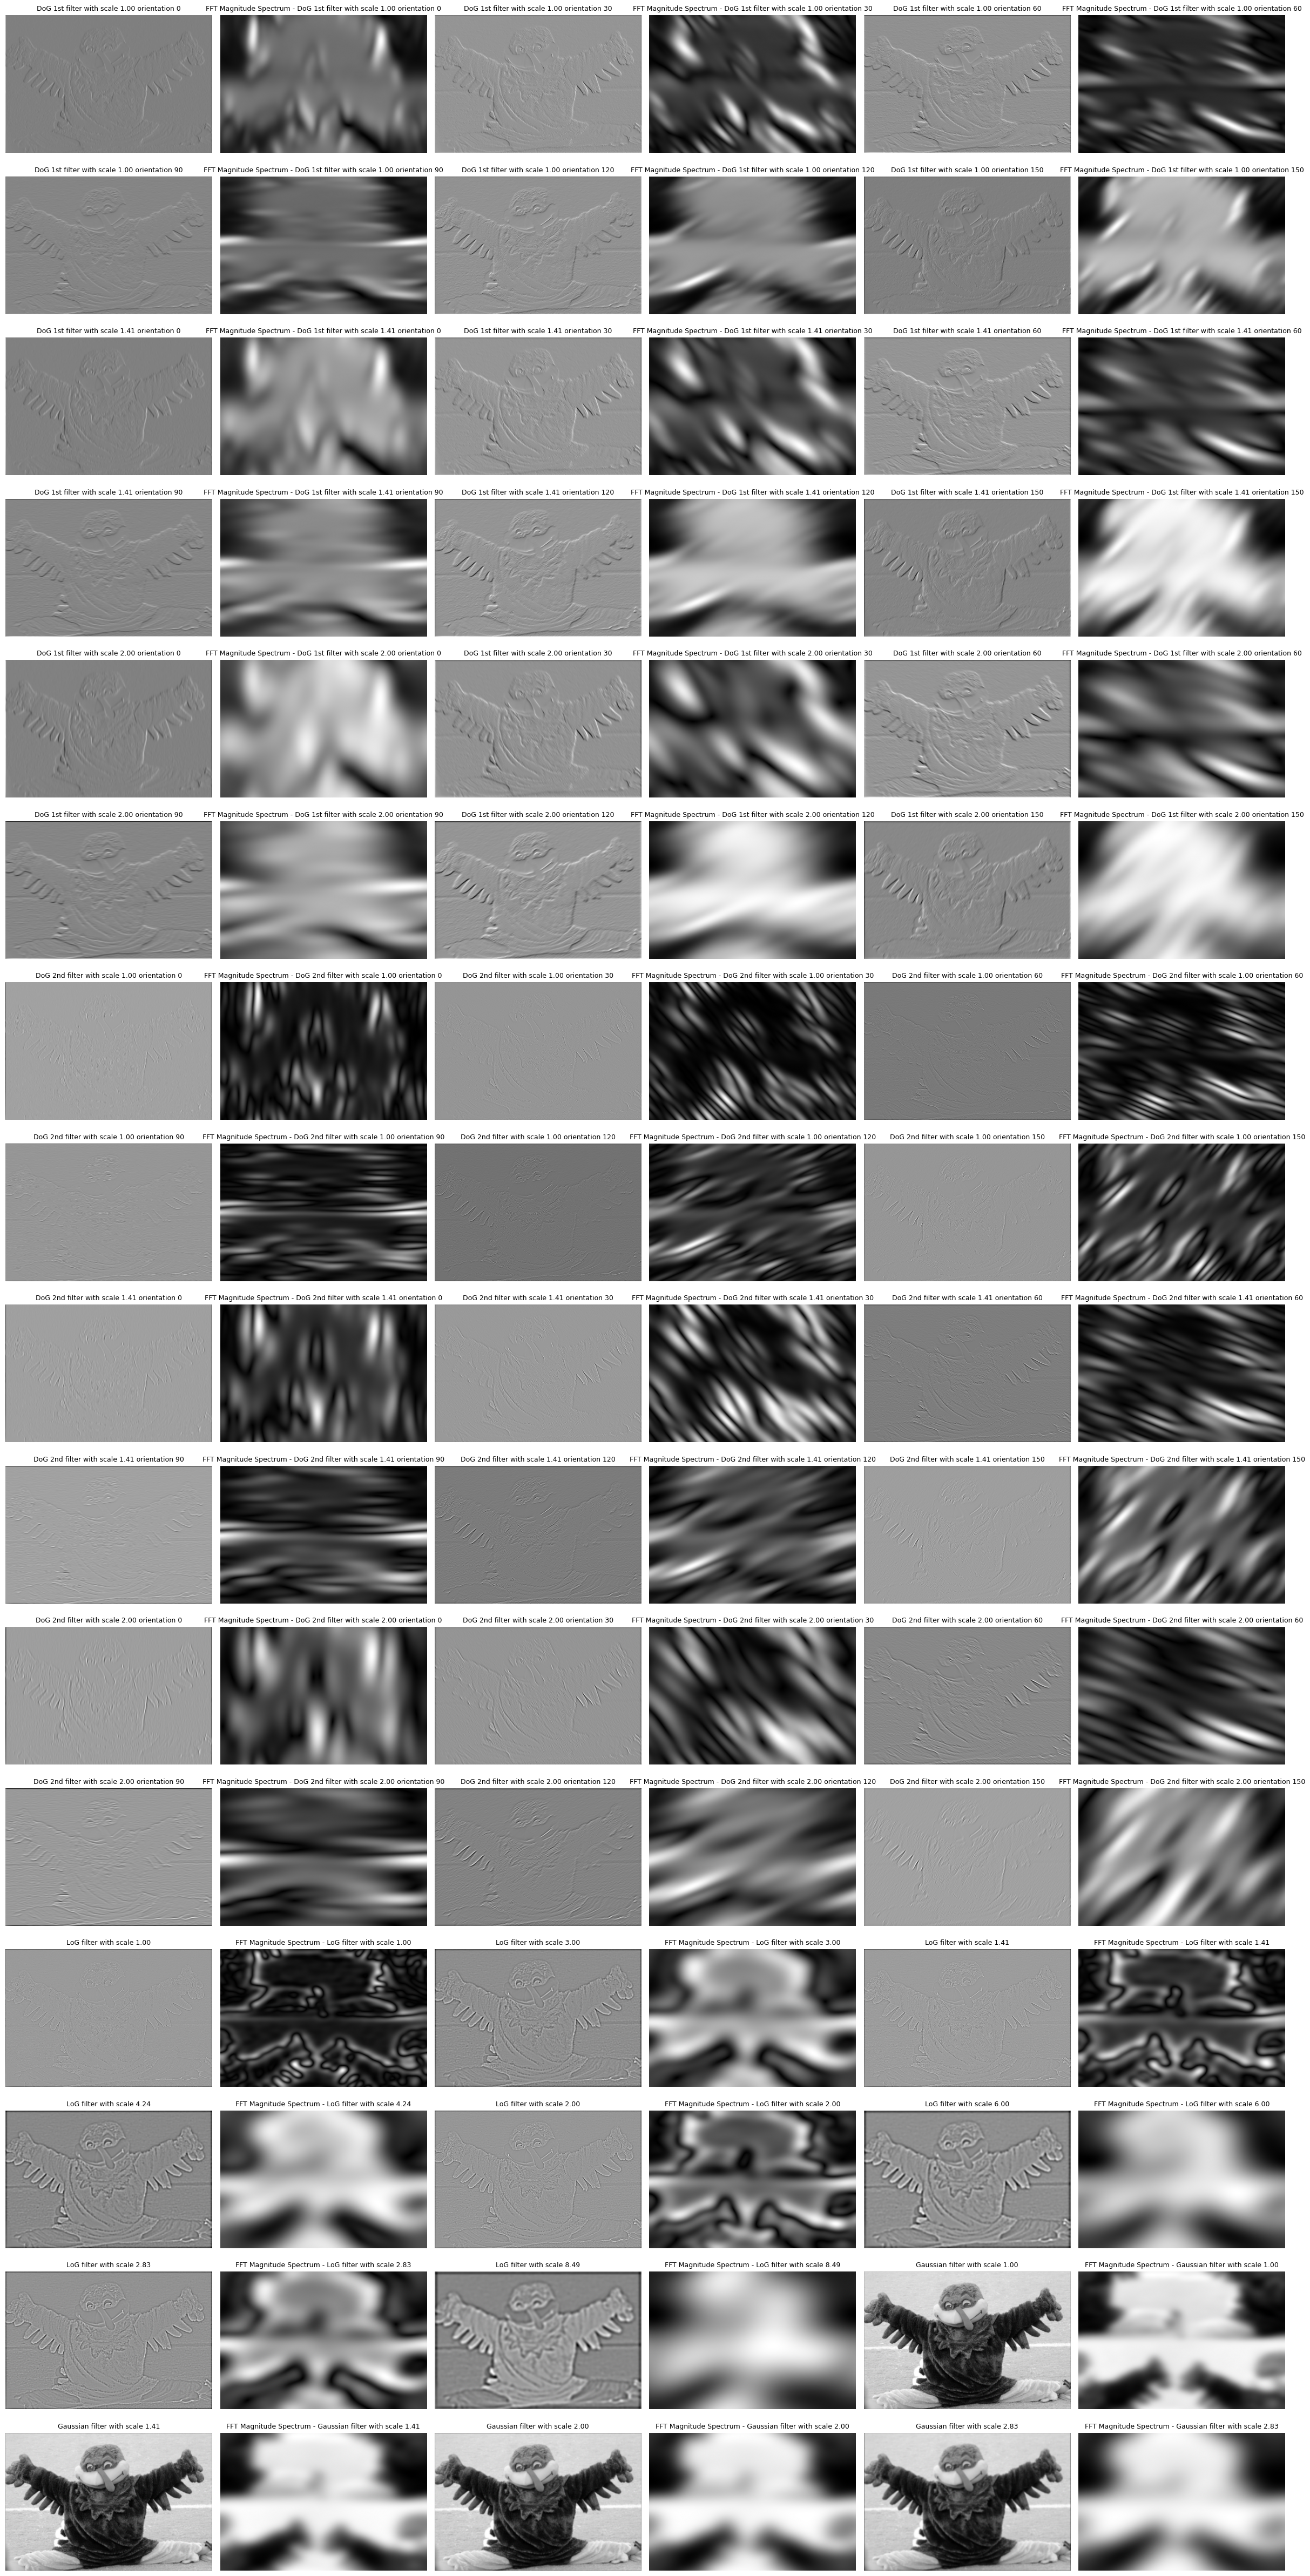

In [ ]:
from scipy import ndimage


# Multiply filters' Fourier transform with the Fourier transform of the image
def conv(filter_fft, img_fft, padding_value=0):
  h, w = img_fft.shape[:2]
  r, c = filter_fft[0].shape[:2]

  padding_h, padding_w = h - r, w - c

  def padding(filter):

    top_padding = padding_h // 2
    bottom_padding = padding_h - top_padding

    left_padding = padding_w // 2
    right_padding = padding_w - left_padding

    return np.pad(filter, ((top_padding, bottom_padding), (left_padding, right_padding)), mode="constant", constant_values=padding_value)

  conv_fft = []

  for i, filter in enumerate(filter_fft):
    padded_filter = padding(filter_fft[i])
    conv_fft.append(padded_filter * img_fft)

  return conv_fft



#  inverse Fourier transform on the resulting product

def inverse(conv_fft):
  conv_fft_inverse = []
  for img in conv_fft:
    conv_fft_inverse.append(fft.ifft2(img))

  return conv_fft_inverse


output_img = conv(filter_fft=filter_fft, img_fft=img_fft, padding_value=0)
output_img = inverse(output_img)


# load filtered images
load_filter = "/content/sample_data/filtered_img.pkl"

with open(load_filter, "rb") as f:
    filter_img = pickle.load(f)


## display
fig, axes = plt.subplots(16, 6, figsize=(24, 48))
for i, ax in enumerate(axes.flat):
    idx = i // 2
    mode = i % 2        # 0=filtering images, 1=Fourier transform of the convolution

    if mode == 0:
        ax.imshow(filter_img[idx], cmap="gray")
        ax.set_title(f"{titles[idx]}", fontsize=9)
    else:
        ax.imshow(np.abs(output_img[idx]), cmap="gray")
        ax.set_title(f"{fft_titles[idx]}", fontsize=9)

    ax.axis("off")

plt.tight_layout()
plt.show()




